<a href="https://colab.research.google.com/github/Neu-Utkarsh/Hands-on-ML-O-Reily-/blob/main/Chapter-4/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(42)
m =100
X= 2*np.random.rand(m,1)
y = 4+3*X + np.random.randn(m,1)

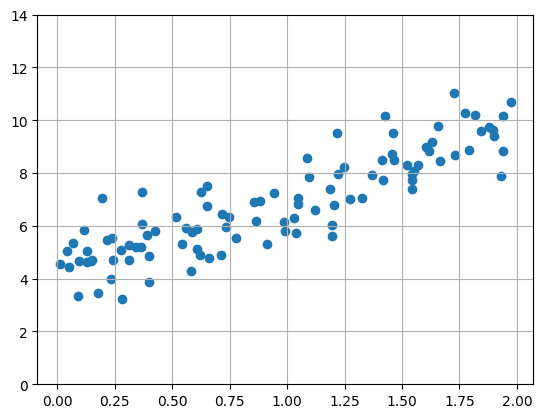

In [3]:
plt.scatter(X,y)
plt.grid()
plt.ylim(0.0,14)
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

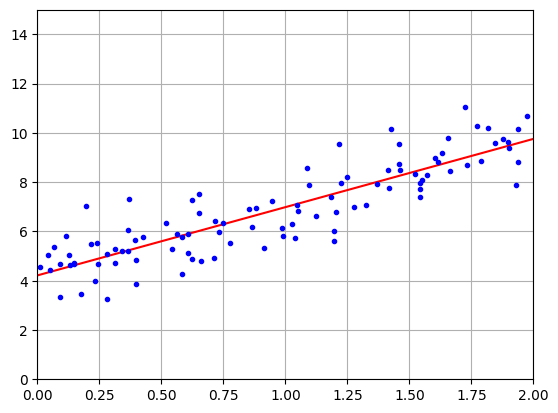

In [7]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.grid()
plt.axis([0,2,0,15])
plt.show()

In [8]:
# using scikit learn model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
# This is used under the hood of LinearRegression cz X.T X can be sometimes non
# invertible so it uses SVD under the hood instead of np.inv

np.linalg.pinv(X_b)@y

array([[4.21509616],
       [2.77011339]])

## Gradient Descent

In [12]:
alpha = 0.1              # learning-rate
n_epochs = 1000
n= len(X_b)              # no.of instances(training ex)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs) :
  gradients = 2/m * X_b.T @ (X_b @ theta - y)
  theta = theta -alpha * gradients

theta

array([[4.21509616],
       [2.77011339]])

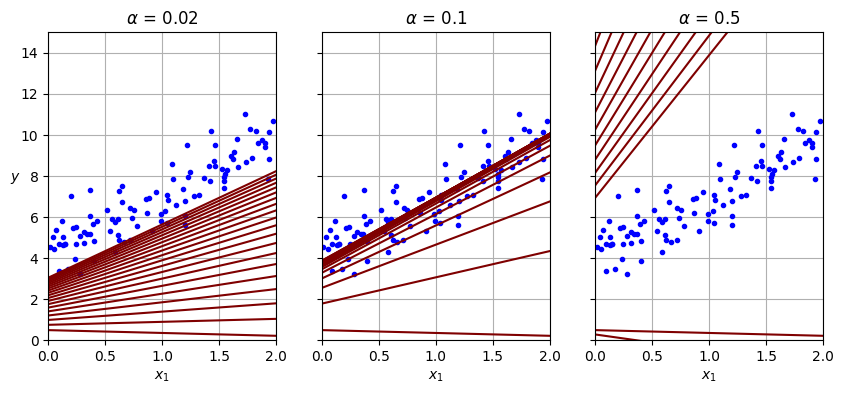

In [13]:
import matplotlib as mpl

def plot_GD(theta,alpha) :
  m = len(X_b)
  plt.plot(X,y,'b.')
  n_epochs = 1000
  n_shown = 20
  theta_path=[]
  for epochs in range(n_epochs) :
    if epochs < n_shown :
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch/n_shown + 0.15))
      plt.plot(X_new,y_predict,color)
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta -alpha * gradients
    theta_path.append(theta)
  plt.xlabel('$x_1$')
  plt.axis([0,2,0,15])
  plt.grid()
  plt.title(fr"$\alpha$ = {alpha}")
  return theta_path

np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_GD(theta, alpha=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_GD(theta, alpha=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_GD(theta, alpha=0.5)

plt.show()

In [14]:
# SGD can be used with leanring_schedules



In [15]:
theta_path_sgd = []

In [16]:
n_epcohs = 50
t0,t1 = 5,50
theta_path_sgd = []
loss_history=[]

def learning_schedule(t) :
  return t0/(t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs) :
  for iteration in range(m) :
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(epoch*m + iteration)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)
  y_pred = X_b @ theta
  loss = np.mean(y_pred - y)**2
  loss_history.append(loss)

theta

array([[4.20492441],
       [2.76038824]])

In [17]:
from  sklearn.linear_model import SGDRegressor

sgd_reg  = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.1,n_iter_no_change=50,random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, n_iter_no_change=50, penalty=None, random_state=42,
             tol=1e-05)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.22213926]), array([2.78317233]))

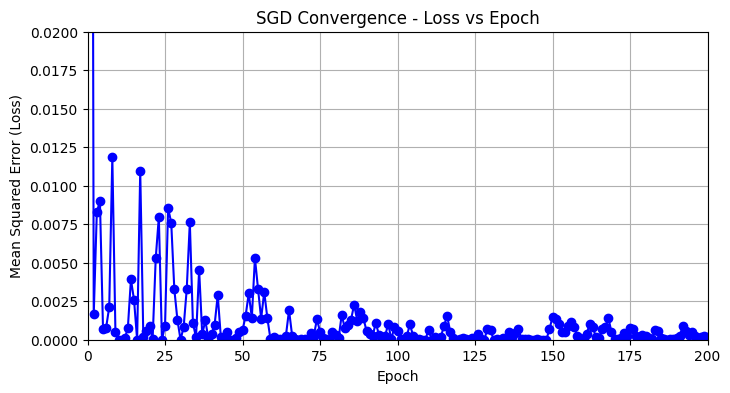

In [19]:
plt.figure(figsize=(8,4))
plt.plot(range(1, n_epochs+1), loss_history, "b-o")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("SGD Convergence - Loss vs Epoch")
plt.axis([0,200,0,0.02])
plt.grid(True)
plt.show()

## Ploynomial Regression



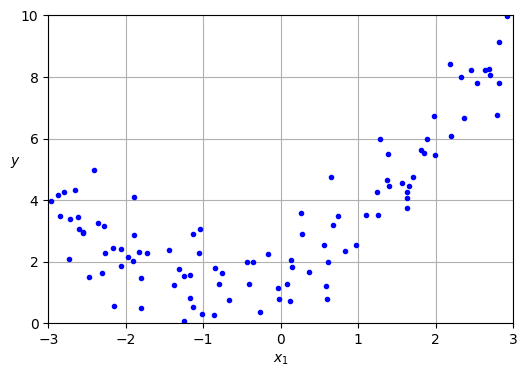

In [20]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=25,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]),
 array([-0.75275929,  0.56664654, -0.42654845,  0.32108831, -0.2417022 ,
         0.18194358, -0.13695972,  0.1030977 , -0.07760775,  0.05841996,
        -0.04397616,  0.03310347, -0.02491894,  0.01875796, -0.01412023,
         0.01062914, -0.00800118,  0.00602296, -0.00453384,  0.00341289,
        -0.00256909,  0.0019339 , -0.00145576,  0.00109584, -0.0008249 ]))

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.52915566]),
 array([[ 1.37564938e+00,  2.45600665e+00, -8.24980604e-01,
         -5.41899877e+00, -1.52386391e+00,  4.46118135e+00,
          2.46392816e+00,  2.00815743e+00,  8.79749224e-01,
         -5.19296375e+00, -2.94330534e+00,  3.48272608e+00,
          2.02987692e+00, -1.24382774e+00, -7.22300610e-01,
          2.68820143e-01,  1.53687881e-01, -3.62888320e-02,
         -2.03197022e-02,  2.99643759e-03,  1.63985591e-03,
         -1.38593465e-04, -7.40937343e-05,  2.75270895e-06,
          1.43811999e-06]]))

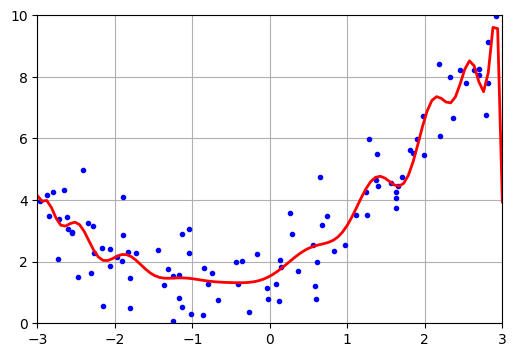

In [23]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)


plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()


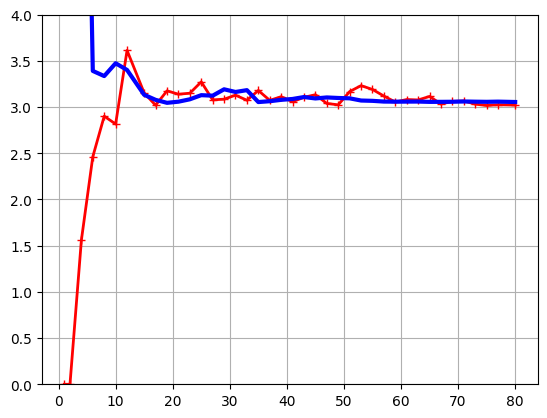

In [24]:
# What learning_curve returns:
# train_sizes → number of training examples used for each subset.
# train_scores → scores on training subsets (for each CV fold).
# valid_scores → scores on validation folds (for each CV fold).

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01,1.0,40), cv=5,scoring='neg_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Training")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validation")
plt.ylim(0,4)
plt.grid()
plt.show()

In [25]:
from sklearn.pipeline import make_pipeline
polynomial_reg = make_pipeline(PolynomialFeatures(degree=10,include_bias=False),
                               LinearRegression())
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_reg, X, y, train_sizes=np.linspace(0.01,1.0,40),cv=5,scoring='neg_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)


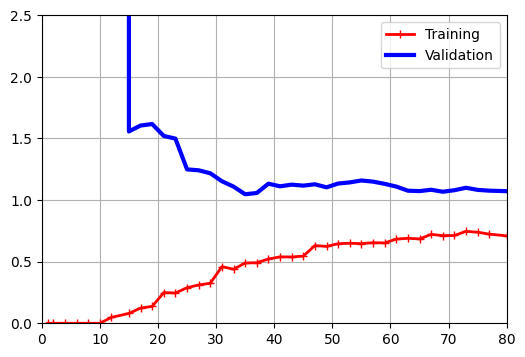

In [26]:
plt.figure(figsize=(6,4))
plt.plot(train_sizes,train_errors,'r-+',linewidth=2,label='Training')
plt.plot(train_sizes,valid_errors,'b-',linewidth=3,label='Validation')
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.legend()
plt.show()

## Regularization
### Ridge
### Lasso
### ElaticNet

In [27]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5*X + np.random.randn(m,1) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)

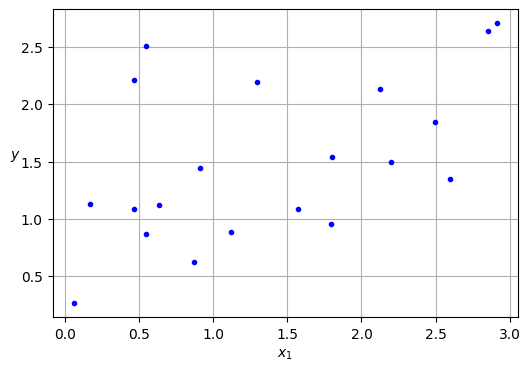

In [28]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.grid()
plt.show()

In [29]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver ='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([1.55325833])

In [30]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([1.55302613])

In [31]:
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55326019])

In [32]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [33]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

# Logistic Regression


In [34]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [35]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [36]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

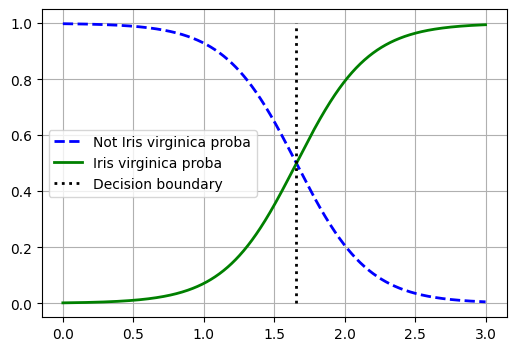

In [50]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(6,4))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")
plt.grid()
plt.legend(loc='center left')
plt.show()

## Softmax Regression

In [51]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

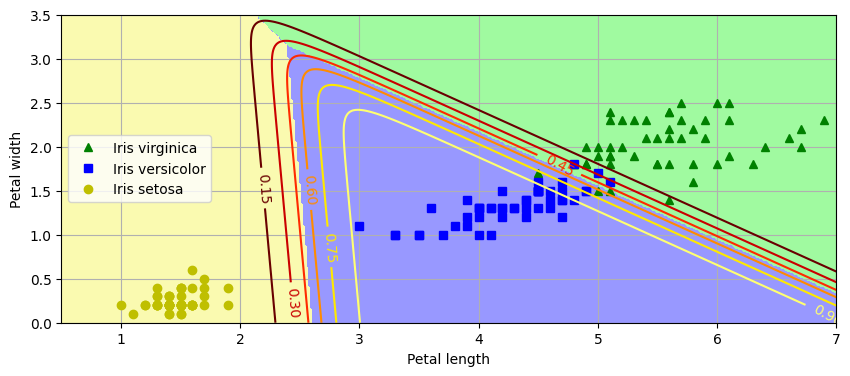

In [54]:


from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()

plt.show()